# Набор данных о студенческом образе жизни

**Атрибуты датасета**: Идентификатор студента, количество учебных часов в день,время дополнительной активности в день, время сна в день, время социальной активности в день, часы физической активности в день, учебный балл, уровень стресса. **Тип представленных данных** - числовой, строковый.

Добавим новый атрибут: процент времени, затрачиваемого на учёбу от суточного времени 'Study_Percentage'.

In [ ]:
import pandas as pd

df = pd.read_csv('student_lifestyle_dataset.csv', delimiter=',')

# Расчет процента времени, потраченного на учебу
df['Study_Percentage'] = (df['Study_Hours_Per_Day'] / 24) * 100
df

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level,Study_Percentage
0,1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate,28.750000
1,2,5.3,3.5,8.0,4.2,3.0,2.75,Low,22.083333
2,3,5.1,3.9,9.2,1.2,4.6,2.67,Low,21.250000
3,4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate,27.083333
4,5,8.1,0.6,6.5,2.2,6.6,3.51,High,33.750000
...,...,...,...,...,...,...,...,...,...
1995,1996,6.5,0.2,7.4,2.1,7.8,3.32,Moderate,27.083333
1996,1997,6.3,2.8,8.8,1.5,4.6,2.65,Moderate,26.250000
1997,1998,6.2,0.0,6.2,0.8,10.8,3.14,Moderate,25.833333
1998,1999,8.1,0.7,7.6,3.5,4.1,3.04,High,33.750000


Из прошлой лабораторной знаем, что в датасете нет выбросов и пропущенных значений, поэтому этап приведения дадасета мы пропускаем -- он уже имеет пригодный к исследованию вид.

Только значение стресса в датасете текстовое. Поменяем значения атрибута 'Stress_Level' в числовые значения соответственно "Low" в 0,2, "Moderate" в 0,6, "High" в 0,9.

In [ ]:
# Создаем словарь для замены текстовых значений на числовые
stress_mapping = {
    "Low": 0.2,
    "Moderate": 0.6,
    "High": 0.9
}

# Заменяем значения в столбце 'Stress_Level'
df['Stress_Level'] = df['Stress_Level'].map(stress_mapping)
df

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level,Study_Percentage
0,1,6.9,3.8,8.7,2.8,1.8,2.99,0.6,28.750000
1,2,5.3,3.5,8.0,4.2,3.0,2.75,0.2,22.083333
2,3,5.1,3.9,9.2,1.2,4.6,2.67,0.2,21.250000
3,4,6.5,2.1,7.2,1.7,6.5,2.88,0.6,27.083333
4,5,8.1,0.6,6.5,2.2,6.6,3.51,0.9,33.750000
...,...,...,...,...,...,...,...,...,...
1995,1996,6.5,0.2,7.4,2.1,7.8,3.32,0.6,27.083333
1996,1997,6.3,2.8,8.8,1.5,4.6,2.65,0.6,26.250000
1997,1998,6.2,0.0,6.2,0.8,10.8,3.14,0.6,25.833333
1998,1999,8.1,0.7,7.6,3.5,4.1,3.04,0.9,33.750000


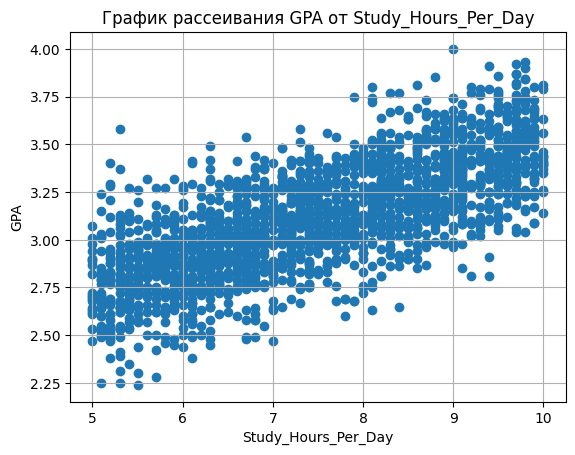

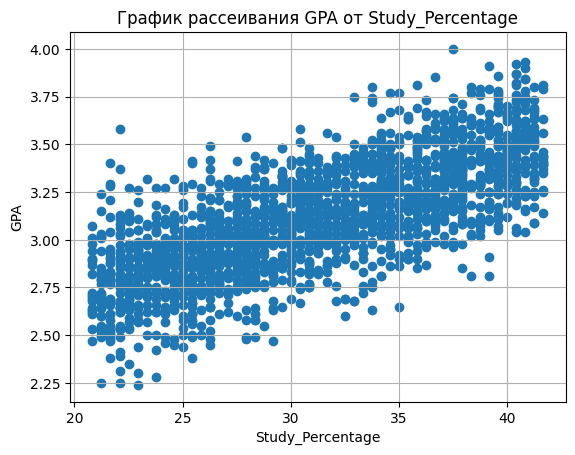

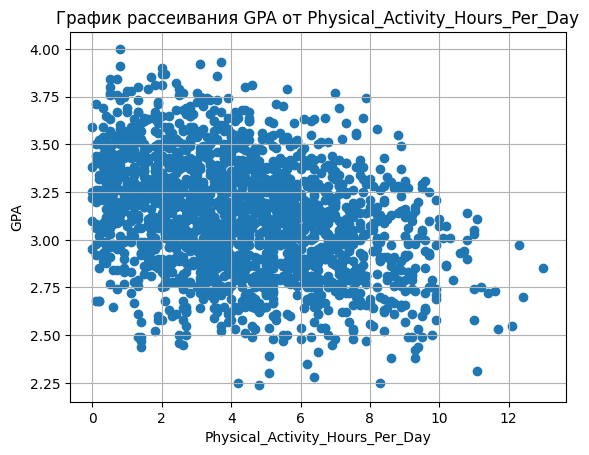

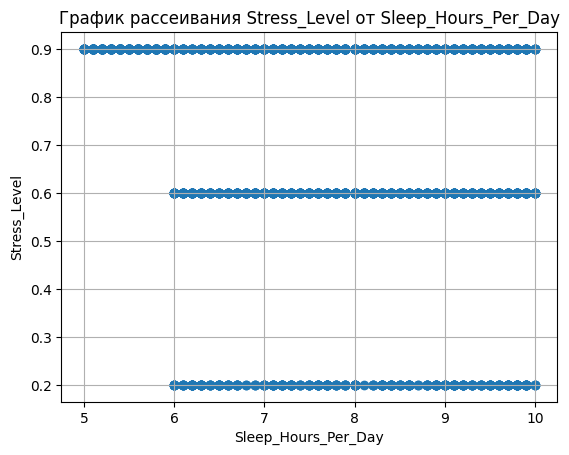

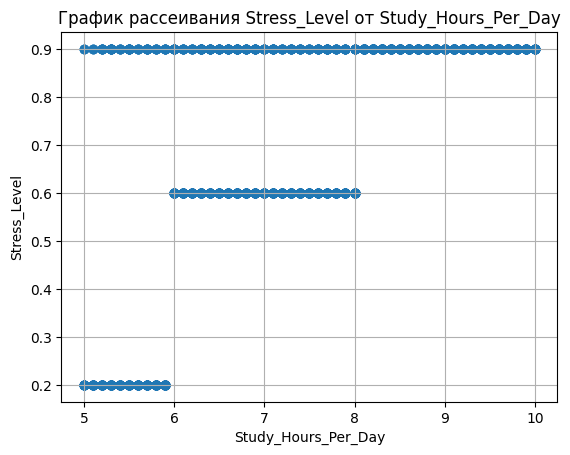

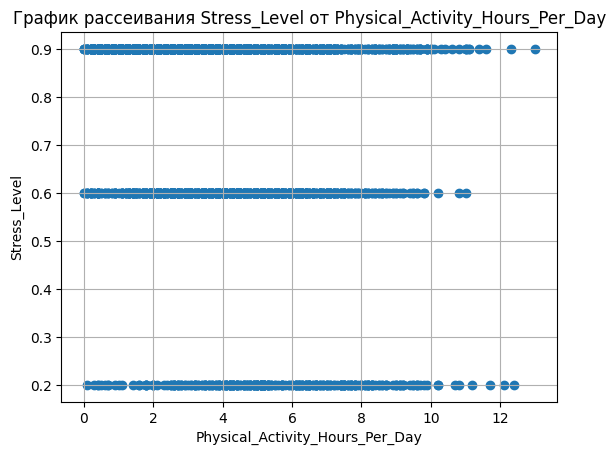

In [ ]:
import matplotlib.pyplot as plt

# Обработка пропущенных значений (если есть) -  замена на среднее значение
for col in ['Study_Hours_Per_Day', 'Extracurricular_Hours_Per_Day', 'Sleep_Hours_Per_Day', 'Social_Hours_Per_Day', 'Physical_Activity_Hours_Per_Day', 'GPA', 'Stress_Level']:
    mean_val = df[col].mean()
    df[col] = df[col].fillna(mean_val)

# Функция для построения графика рассеяния с заголовком
def plot_scatter(x_col, y_col):
    plt.scatter(df[x_col], df[y_col])
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f'График рассеивания {y_col} от {x_col}')
    plt.grid(True)
    plt.show()

# Построение графиков рассеивания
plot_scatter('Study_Hours_Per_Day', 'GPA')
plot_scatter('Study_Percentage', 'GPA')
plot_scatter('Physical_Activity_Hours_Per_Day', 'GPA')
plot_scatter('Sleep_Hours_Per_Day', 'Stress_Level')
plot_scatter('Study_Hours_Per_Day', 'Stress_Level')
plot_scatter('Physical_Activity_Hours_Per_Day', 'Stress_Level')

Описание паттернов:

Зависимость **('Study_Hours_Per_Day' от 'GPA')** и **('Study_Percentage' от 'GPA')**: Между значениями атрибутов сильно выраженная прямая зависимость. Графики похожи, чего и следовало ожидать, ведь 'Study_Percentage' это математически иначе представленное 'Study_Hours_Per_Day'.

**('Physical_Activity_Hours_Per_Day' от 'GPA')** точки на графике имеют тенденцию к расположению в одной области -- зависимость выявить нельзя, но можно выявить норму.

**('Sleep_Hours_Per_Day' от 'Stress_Level')** уровень стресса почти не зависит от уровня сна, но можно заметить, тех кто спит меньше всего мз этой выборки -- 5-6 часов самый сильный уровень стресса.

**('Study_Hours_Per_Day' от 'Stress_Level')** уровень стресса не напрямую зависит от времени учёбы, однако можно выявить такие закономерности: самый низкий уровень стресса испытывают только студенты, тратящие минимальное количество времени, из данной выборки, на учёбу 5-6 часов. Средний уровень стресса испытывают только те студенты, которые тратят среднее по данной выборке время на учёбу 6-8. Самый сильный уровень стресса могут испытывать все студенты. Но те, кто учится наибольшее время 8-10 часов испытывают исключительно сильный стресс.

**('Physical_Activity_Hours_Per_Day' от 'Stress_Level')** не имеет никакой кореляции с уровнем стресса.

Никаких *ярко выраженных кластеров нет*. Наиболее выражена **('Study_Hours_Per_Day' от 'Stress_Level')**, дальше рассмотрим её. Визуально выделяется 3 основных группы, описанные выше, поэтому применяя метод кластеризации KMeans зададим количество кластеров параметром n_clusters = 3.

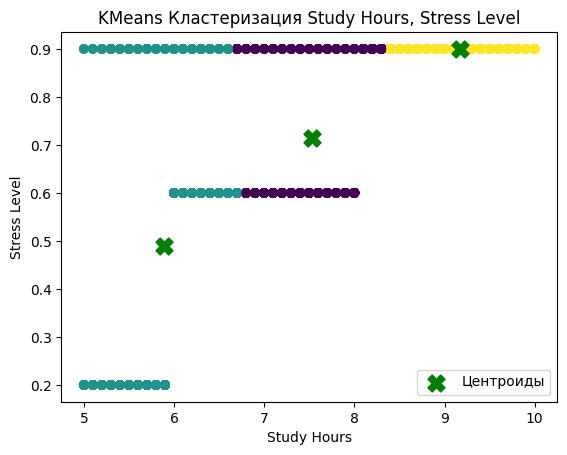

In [ ]:
from sklearn.cluster import KMeans

# Выбираем данные для кластеризации
X = df[['Study_Hours_Per_Day', 'Stress_Level']]

# Создаем модель KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)

# Получаем метки кластеров
labels = kmeans.labels_

# Добавляем метки кластеров в DataFrame
df['Cluster'] = labels

# Визуализация результатов
plt.scatter(df['Study_Hours_Per_Day'], df['Stress_Level'], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=150, c='green', marker='X', label='Центроиды')
plt.title('KMeans Кластеризация Study Hours, Stress Level')
plt.xlabel('Study Hours')
plt.ylabel('Stress Level')
plt.legend()
plt.show()

Построен график кластеризации: данные сгруппированы кластеры и обозначены цветом, найдены центроиды кластеров.

Кластеры совпадают с описанной выше зависимостью.

> **('Study_Hours_Per_Day' от 'Stress_Level')** уровень стресса не напрямую зависит от времени учёбы, однако можно выявить такие закономерности: самый низкий уровень стресса испытывают только студенты, тратящие минимальное количество времени, из данной выборки, на учёбу 5-6 часов. Средний уровень стресса испытывают только те студенты, которые тратят среднее по данной выборке время на учёбу 6-8. Самый сильный уровень стресса могут испытывать все студенты. Но те, кто учится наибольшее время 8-10 часов испытывают исключительно сильный стресс.



Построим так же кластеризацию для зависимотей
('Physical_Activity_Hours_Per_Day' от 'GPA'),
('Study_Hours_Per_Day', 'GPA'). Зададим количество кластеров параметром n_clusters 5 и 4.

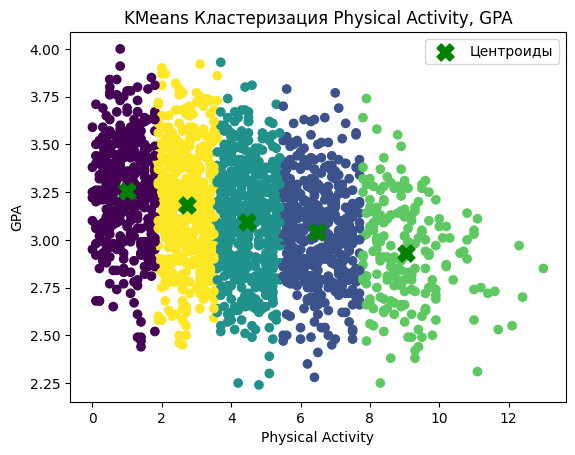

In [ ]:
# Выбираем данные для кластеризации
X = df[['Physical_Activity_Hours_Per_Day', 'GPA']]

# Создаем модель KMeans
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(X)

# Получаем метки кластеров
labels = kmeans.labels_

# Добавляем метки кластеров в DataFrame
df['Cluster'] = labels

# Визуализация результатов
plt.scatter(df['Physical_Activity_Hours_Per_Day'], df['GPA'], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=150, c='green', marker='X', label='Центроиды')
plt.title('KMeans Кластеризация Physical Activity, GPA')
plt.xlabel('Physical Activity')
plt.ylabel('GPA')
plt.legend()
plt.show()

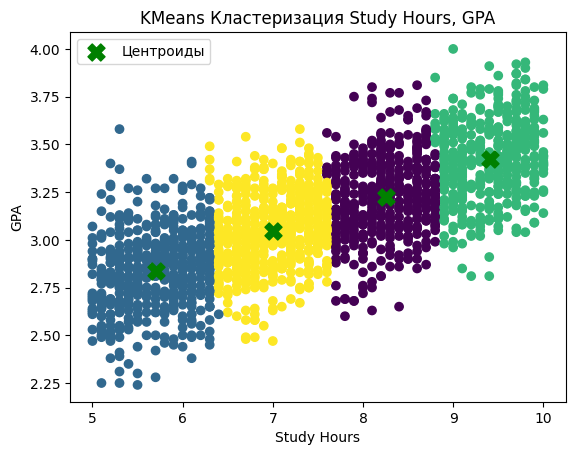

In [ ]:
# Выбираем данные для кластеризации
X = df[['Study_Hours_Per_Day', 'GPA']]

# Создаем модель KMeans
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X)

# Получаем метки кластеров
labels = kmeans.labels_

# Добавляем метки кластеров в DataFrame
df['Cluster'] = labels

# Визуализация результатов
plt.scatter(df['Study_Hours_Per_Day'], df['GPA'], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=150, c='green', marker='X', label='Центроиды')
plt.title('KMeans Кластеризация Study Hours, GPA')
plt.xlabel('Study Hours')
plt.ylabel('GPA')
plt.legend()
plt.show()

Из двух последних построенных графиков кластеризации видим, что если кластеров в явном виде нет, то точки на графике группируются с ближайшими просто на равные части.